In [1]:
# A code to enter orbital elements into Rebound and save output to arrays
import matplotlib.pyplot as plt
import rebound
import datetime
begin_clock = datetime.datetime.now()




from math import *
from numpy import *

# Constants
Mearth = 1.0/332940.0
GMsun = 1.3271244e20 # [m3 s-2]
au = 149597870700.0 # [m]
G = GMsun*(86400**2)/au**3 # au, days, Msun

tepoch = 0.6
ms = 1.0

print("G is in au, days, Msun. ",G)

# write out initial orbital elements for each planet here
# m, a, e, i, Omega, omega, theta

mb,mc,md = 1.0*Mearth,1.0*Mearth,1.0*Mearth
ab,ac,ad = 1.0,2.0,3.0 
thetab,thetac,thetad = 0.1,0.2,0.3

eb,ec,ed = 0,0,0
omegab,omegac,omegad = 0,0,0
Ib,Ic,Id = 0,0,0
Omegab,Omegac,Omegad = 0,0,0





sim = rebound.Simulation()
sim.integrator = 'whfast'
sim.t = 0.0
sim.G = G

sim.add(m=ms) # star
sim.add(m=mb, a=ab, e=eb, inc=Ib, Omega=Omegab, omega=omegab, theta = thetab) 
sim.add(m=mc, a=ac, e=ec, inc=Ic, Omega=Omegac, omega=omegac, theta = thetac) 
sim.add(m=md, a=ad, e=ed, inc=Id, Omega=Omegad, omega=omegad, theta = thetad)


sim.move_to_com() # Moves to the center of momentum frame
sim.status() # print out initial conditions.
ps = sim.particles

year = 365.25; # days
Tfinal = 100*year;
tmax = Tfinal


Nout = 1000 # number of printed out timesteps.
a1,a2,a3,P1,P2,P3 = zeros(Nout), zeros(Nout), zeros(Nout), zeros(Nout), zeros(Nout), zeros(Nout)
e1,e2,e3,i1,i2,i3 = zeros(Nout), zeros(Nout), zeros(Nout), zeros(Nout), zeros(Nout), zeros(Nout)
l1,l2,l3 = zeros(Nout), zeros(Nout), zeros(Nout)
x1,x2,x3 = zeros(Nout), zeros(Nout), zeros(Nout)
phi = zeros(Nout)

times = linspace(0.,tmax,Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    a1[i],a2[i],a3[i] = ps[1].a,ps[2].a,ps[3].a
    
    e1[i],e2[i],e3[i] = ps[1].e,ps[2].e,ps[3].e
    P1[i],P2[i],P3[i] = ps[1].P,ps[2].P,ps[3].P
    l1[i],l2[i],l3[i] = ps[1].l,ps[2].l,ps[3].l
    phi[i] = 1.0*l1[i]-2*l2[i]+1*l3[i] # This is a false example of resonant argument
    x1[i],x2[i],x3[i] = ps[1].x,ps[2].x,ps[3].x
stop_clock = datetime.datetime.now()
walltime = stop_clock-begin_clock
print("Sim over ",Tfinal/year," years took  ",walltime,"  walltime \n")


print(walltime)


G is in au, days, Msun.  0.00029591220819207774
---------------------------------
REBOUND version:     	4.4.6
REBOUND built on:    	Dec 30 2024 23:55:53
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x1f7eb1d02d0, m=1.0 x=-1.748394966318106e-05 y=-4.156070232275136e-06 z=0.0 vx=2.1231689746452948e-08 vy=-1.1571264127595787e-07 vz=0.0>
<rebound.particle.Particle object at 0x1f7eb1d1950, m=3.0035441821349193e-06 x=0.9949866813283627 y=0.09982926057659589 z=0.0 vx=-0.0017173256587720346 vy=0.01711607009598123 vz=0.0>
<rebound.particle.Particle object at 0x1f7eb1d02d0, m=3.0035441821349193e-06 x=1.9601186602628158 y=0.39733480537306726 z=0.0 vx=-0.0024165494591959946 vy=0.011921227736603781 vz=0.0>
<rebound.particle.Particle object at 0x1f7eb1d1950, m=3.0035441821349193e-06 x=2.866000859268321 y=0.8865579571840199 z=0.0 vx=-0.002935003666

C:\Users\Andrew\AppData\Local\Temp\ipykernel_21480\1320952006.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(times/year,phi*180/pi, 'b.', marker=".", markersize=1)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_21480\1320952006.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=24)


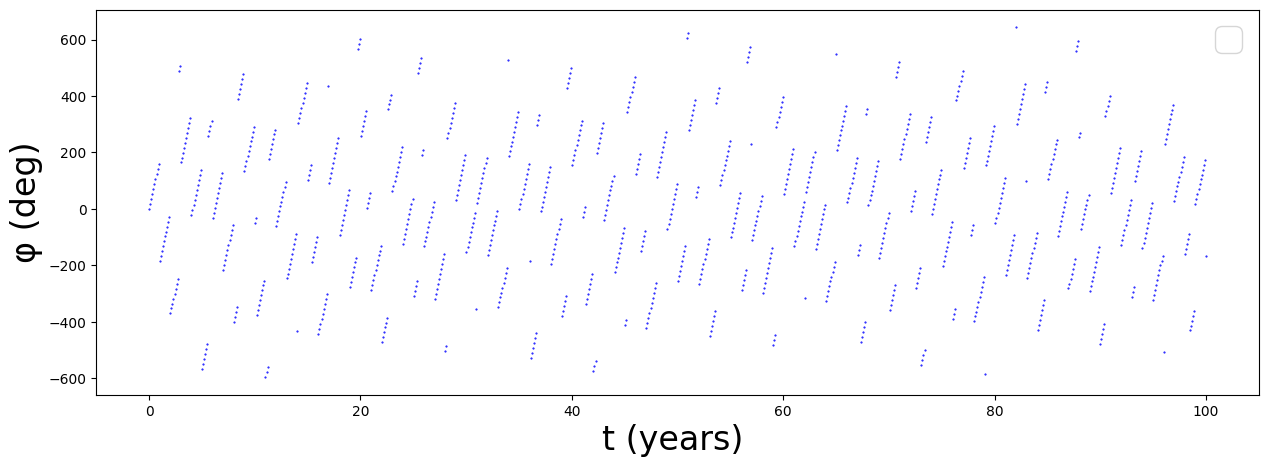

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.plot(times/year,phi*180/pi, 'b.', marker=".", markersize=1)
#ax.plot(times/year,x1, 'b.', marker=".", markersize=1)
ax.set_xlabel("t (years) ", fontsize=24)
ax.set_ylabel("\u03C6 (deg)", fontsize=24)
#ax.set_ylabel("x(b) AU", fontsize=24)
ax.legend(fontsize=24)
